<a href="https://colab.research.google.com/github/MuhammadBilal-Hub771/ML/blob/main/Emtiondection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/train'


In [ ]:
import os

files = os.listdir(folder_path)
print(files)

['sad', 'happy', 'neutral', 'disgusted', 'angry', 'fearful', 'surprised']


In [ ]:
# Install TensorFlow
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Install OpenCV
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)

        if os.path.isdir(subfolder_path):
            label = subfolder
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)

                if img is not None:
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

In [ ]:
folder_path = '/content/drive/MyDrive/train'

images, labels = load_images_from_folder(folder_path)

images = images / 255.0

In [ ]:
folder_path = '/content/drive/MyDrive/test'

images_test, labels_test = load_images_from_folder(folder_path)

images_test = images_test / 255.0

In [ ]:
l=[]
for i in range(len(images)):
    l.append(resize(images[i], (28, 28, 3), anti_aliasing=True))
resized_images=np.array(l)
resized_images

array([[[[0.09647172, 0.09647172, 0.09647172],
         [0.12701944, 0.12701944, 0.12701944],
         [0.13381423, 0.13381423, 0.13381423],
         ...,
         [0.7507749 , 0.7507749 , 0.7507749 ],
         [0.72802308, 0.72802308, 0.72802308],
         [0.70216266, 0.70216266, 0.70216266]],

        [[0.11545935, 0.11545935, 0.11545935],
         [0.14475859, 0.14475859, 0.14475859],
         [0.14857023, 0.14857023, 0.14857023],
         ...,
         [0.74380241, 0.74380241, 0.74380241],
         [0.73796893, 0.73796893, 0.73796893],
         [0.71083534, 0.71083534, 0.71083534]],

        [[0.14302329, 0.14302329, 0.14302329],
         [0.17073662, 0.17073662, 0.17073662],
         [0.16403887, 0.16403887, 0.16403887],
         ...,
         [0.76051918, 0.76051918, 0.76051918],
         [0.71072813, 0.71072813, 0.71072813],
         [0.71581188, 0.71581188, 0.71581188]],

        ...,

        [[0.79075142, 0.79075142, 0.79075142],
         [0.88428638, 0.88428638, 0.88428638]

In [ ]:
l=[]
for i in range(len(images_test)):
    l.append(resize(images_test[i], (28, 28, 3), anti_aliasing=True))
resized_images_test=np.array(l)
resized_images_test

array([[[[0.94979125, 0.94979125, 0.94979125],
         [0.90151711, 0.90151711, 0.90151711],
         [0.16636307, 0.16636307, 0.16636307],
         ...,
         [0.55206942, 0.55206942, 0.55206942],
         [0.50017097, 0.50017097, 0.50017097],
         [0.47157248, 0.47157248, 0.47157248]],

        [[0.94277394, 0.94277394, 0.94277394],
         [0.80826655, 0.80826655, 0.80826655],
         [0.04560377, 0.04560377, 0.04560377],
         ...,
         [0.48897991, 0.48897991, 0.48897991],
         [0.5105204 , 0.5105204 , 0.5105204 ],
         [0.48801232, 0.48801232, 0.48801232]],

        [[0.9627877 , 0.9627877 , 0.9627877 ],
         [0.58186657, 0.58186657, 0.58186657],
         [0.04238698, 0.04238698, 0.04238698],
         ...,
         [0.51014447, 0.51014447, 0.51014447],
         [0.53610437, 0.53610437, 0.53610437],
         [0.49089239, 0.49089239, 0.49089239]],

        ...,

        [[0.00936249, 0.00936249, 0.00936249],
         [0.0326092 , 0.0326092 , 0.0326092 ]

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)
y_test  = label_encoder.fit_transform(labels_test)

# Define input_size based on the flattened image dimensions (28x28x3)
# Ensure resized_images is not empty before accessing its shape
if len(resized_images) > 0:
    input_size = resized_images.shape[1] * resized_images.shape[2] * resized_images.shape[3]
else:
    # Handle case where training data is empty - maybe set a default or raise an error
    print("Warning: Training images are empty. Cannot determine input size.")
    input_size = None # Or set a default appropriate for your use case

# Perform label encoding for training labels BEFORE defining the model
# This section appears to be a duplicate of the first few lines, keeping the first one
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(labels)

# Define num_output_classes based on the number of unique classes in the training labels
# This assumes label_encoder has been fitted to the training labels
if hasattr(label_encoder, 'classes_'):
    num_output_classes = len(label_encoder.classes_)
else:
    # Handle case where label_encoder was not fitted or no classes found
    print("Warning: No classes found in training labels. Cannot determine output classes.")
    num_output_classes = 0 # Or set a default appropriate for your use case

# model
# Only define the model if input_size and num_output_classes are valid
if input_size is not None and num_output_classes > 0:
    model = Sequential() # Re-initialize the model if it was created with 0 output classes
    model.add(Dense(2048, activation='relu', input_shape=(input_size,)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_output_classes, activation='softmax')) # Use the inferred number of classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Convert y_train to categorical AFTER fitting the label encoder and determining num_classes
    y_train_cat = to_categorical(y_train, num_classes=num_output_classes)

    # Convert y_test to categorical using the same number of classes from training
    # Ensure y_test exists and is not empty before converting
    if 'y_test' in locals() and len(y_test) > 0:
        y_test_cat = to_categorical(y_test, num_classes=num_output_classes)
    else:
        y_test_cat = np.array([]) # Assign empty if no test labels

    # Assign the resized images to X_train and X_test
    X_train = resized_images.reshape(len(resized_images), input_size)
    X_test = resized_images_test.reshape(len(resized_images_test), input_size)


    # train
    # Only include validation data if both X_test and y_test_cat are not empty
    if len(X_test) > 0 and len(y_test_cat) > 0:
        print("Training model with validation data.")
        model.fit(X_train, y_train_cat, epochs=30, validation_data=(X_test, y_test_cat))
    elif len(X_train) > 0 and len(y_train_cat) > 0:
         print("Training model without validation data (test data is empty).")
         model.fit(X_train, y_train_cat, epochs=30)
    else:
         print("Cannot train model: Training data (X_train or y_train_cat) is empty.")
else:
    print("Model definition skipped due to invalid input size or number of output classes.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with validation data.
Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 235ms/step - accuracy: 0.2378 - loss: 1.8415 - val_accuracy: 0.2480 - val_loss: 1.8138
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 207s 231ms/step - accuracy: 0.2720 - loss: 1.7806 - val_accuracy: 0.2695 - val_loss: 1.7604
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 207s 230ms/step - accuracy: 0.3071 - loss: 1.7294 - val_accuracy: 0.3348 - val_loss: 1.7127
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 207s 231ms/step - accuracy: 0.3240 - loss: 1.7041 - val_accuracy: 0.3156 - val_loss: 1.7076
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 211s 235ms/step - accuracy: 0.3310 - loss: 1.6868 - val_accuracy: 0.3533 - val_loss: 1.6637
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 208s 232ms/step - accuracy: 0.3322 - loss: 1.6744 - val_accuracy: 0.3522 - val_loss: 1.6486
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 207s 231ms/step - accuracy: 0.3515 - loss: 1.6577 - val_accuracy: 0.3394 - val_loss: 1.6609
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# model_json = model.to_json()
# with open("ann_model.json", "w") as json_file:
#     json_file.write(model_json)

# save trained model weight in .h5 file
# Change the filename to end with .weights.h5
model.save_weights('ann_model.weights.h5')

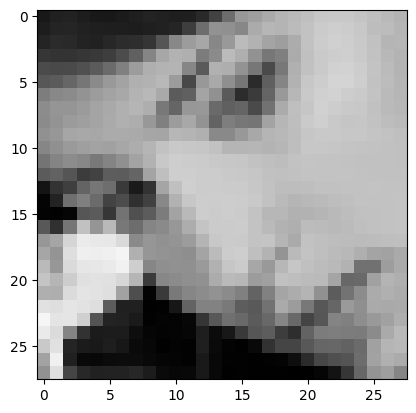

In [ ]:
# Display the first image from the training set
plt.imshow(resize(images[0], (28, 28, 3), anti_aliasing=True), cmap=plt.cm.binary)
plt.show()

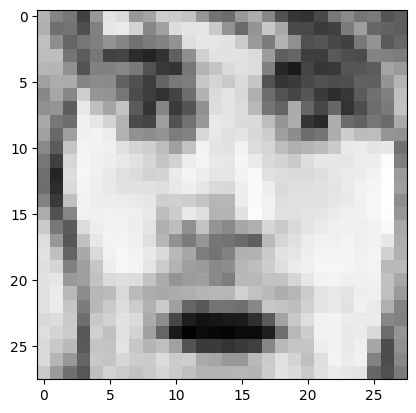

In [ ]:
# Display the last image from the resized training set
# The size of the first axis of resized_images is 4568, so the valid indices are 0 to 4567.
# We will display the last image, which is at index 4567.
plt.imshow(resized_images[len(resized_images) - 1], cmap=plt.cm.binary)
plt.show()